We explore $\zeta$ divergence estimates between the likelihood and pseudo-likelihood with 
truncated $N$-range in order to better understand where the non-Gaussianity is coming from. 

In [1]:
import numpy as np 
import scipy as sp 

import env
import util as UT
import nongauss as NG

In [2]:
from numpy.random import multivariate_normal as mvn

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

First lets try to reproduce the results from the paper

In [4]:
X_mock = NG.X_gmf_all()
n_mock = X_mock.shape[0] # number of mocks
print X_mock.shape[0], 'x', X_mock.shape[1]

20000 x 8


In [5]:
X_mock_meansub, _ = NG.meansub(X_mock)
X_w, _ = NG.whiten(X_mock_meansub, method='pca')#, method='choletsky')
C_X = np.cov(X_w.T)

In [6]:
div_ref = [] 
for i in range(100): 
    print i
    Xref = mvn(np.zeros(X_mock.shape[1]), C_X, size=n_mock)
    div_ref_i = NG.kNNdiv_gauss(Xref, C_X, Knn=10, div_func='kl', Nref=10000)
    div_ref.append(div_ref_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
div = [] 
for i in range(100): 
    print i
    div_i = NG.kNNdiv_gauss(X_w, C_X, Knn=10, div_func='kl', Nref=10000)
    div.append(div_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
print np.min(div), np.max(div), np.mean(div)

0.13491 0.170939 0.154587


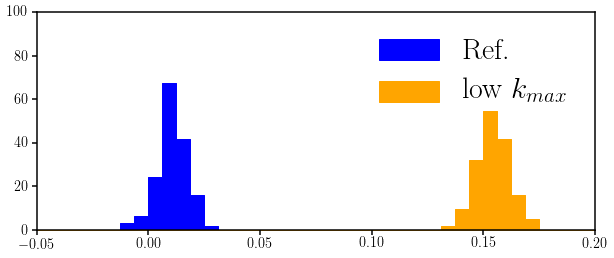

In [46]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 100.])
sub.set_xlim([-0.05, 0.2])
sub.legend(loc='upper right', prop={'size': 30})

Lets first remove the highest $N$ bin

In [27]:
gmf_list = []
for i in range(100):
    name = ('manodeep.run%i' % i)
    gmf_i = NG.X_gmf(name)
    gmf_list.append(gmf_i[:,:-1])
X_mock1 = np.concatenate(gmf_list)

In [28]:
print X_mock1.shape[0], 'x', X_mock1.shape[1]

20000 x 7


In [29]:
X_mock1_meansub, _ = NG.meansub(X_mock1)
X_w1, _ = NG.whiten(X_mock1_meansub, method='pca')#, method='choletsky')
C_X1 = np.cov(X_w1.T)

In [30]:
div_ref1 = [] 
for i in range(100): 
    print i
    Xref1 = mvn(np.zeros(X_mock1.shape[1]), C_X1, size=n_mock)
    div_ref1_i = NG.kNNdiv_gauss(Xref1, C_X1, Knn=10, div_func='kl', Nref=10000)
    div_ref1.append(div_ref1_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [31]:
div_trunc1 = [] 
for i in range(100): 
    print i
    div_trunc1_i = NG.kNNdiv_gauss(X_w1, C_X1, Knn=10, div_func='kl', Nref=10000)
    div_trunc1.append(div_trunc1_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [44]:
print np.min(div_trunc1), np.max(div_trunc1), np.mean(div_trunc1)

0.0752134 0.100446 0.0864265


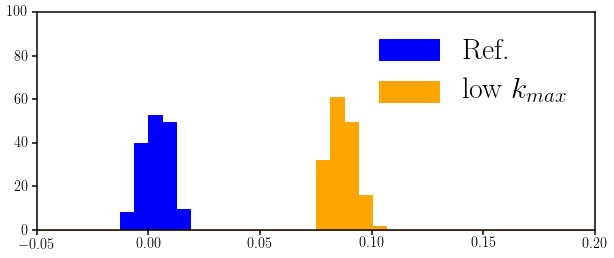

In [37]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref1, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc1, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 100.])
sub.set_xlim([-0.05, 0.2])
sub.legend(loc='upper right', prop={'size': 30})

In [38]:
gmf_list = []
for i in range(100):
    name = ('manodeep.run%i' % i)
    gmf_i = NG.X_gmf(name)
    gmf_list.append(gmf_i[:,1:])
X_mock2 = np.concatenate(gmf_list)

In [39]:
print X_mock2.shape[0], 'x', X_mock2.shape[1]

20000 x 7


In [40]:
X_mock2_meansub, _ = NG.meansub(X_mock2)
X_w2, _ = NG.whiten(X_mock2_meansub, method='pca')#, method='choletsky')
C_X2 = np.cov(X_w2.T)

In [41]:
div_ref2 = [] 
for i in range(100): 
    print i
    Xref2 = mvn(np.zeros(X_mock2.shape[1]), C_X2, size=n_mock)
    div_ref2_i = NG.kNNdiv_gauss(Xref2, C_X2, Knn=10, div_func='kl', Nref=10000)
    div_ref2.append(div_ref2_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [42]:
div_trunc2 = [] 
for i in range(100): 
    print i
    div_trunc2_i = NG.kNNdiv_gauss(X_w2, C_X2, Knn=10, div_func='kl', Nref=10000)
    div_trunc2.append(div_trunc2_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [45]:
print np.min(div_trunc2), np.max(div_trunc2), np.mean(div_trunc2)

0.12216 0.154273 0.135562


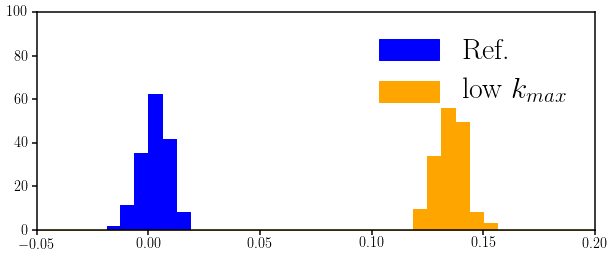

In [43]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref2, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc2, normed=True, range=[-0.05, 0.2], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 100.])
sub.set_xlim([-0.05, 0.2])
sub.legend(loc='upper right', prop={'size': 30})